<a href="https://colab.research.google.com/github/Habibmaryam/real-time-tracking-solution/blob/main/Copy_of_Capstone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import f_oneway, kruskal
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset

df = pd.read_csv("/content/drive/MyDrive/Trackage.csv")
df.head(1)

,Timestamp,1. What is your age range?,2. What is your gender?,3. Kindly state your country,4. Have you ever used the delivery services of an e-commerce company for shipping or delivery services?,5. Have you ever used a real-time tracking solution for your ordered lunch or breakfast/shipment/e-commerce order?,6. How often do you utilize the services of a logistics company with a tracking feature?,7. Do you receive your orders/packages/shipments at the agreed-upon time?,"8. On a scale of 1 to 5, how easy is it for you to track your packages / shipments (1 being very difficult, 5 being very easy)",9. Please select the challenges you have faced while trying to track your packages / shipments. Select all that applies.,"10. On a scale of 1 to 5, how satisfied are you with your current delivery tracking experience?",11. How important is it for you to receive real-time updates on the status and location of your packages / shipment?,"12. Would you be willing to use a feature that integrates Maps to provide real-time location updates for your packages / shipments, allowing you to visualize and track its exact location in real life?",13. Would the availability of a real-time package/goods/shipment tracking feature increase your likelihood of you ordering goods online?,14. Is there anything you would like to share about your experiences with delivery tracking app or services? Kindly state them below.,15. Is there any other feature you would like us to add to our real-time tracking solution? Kindly state them below.
0,3/14/2024 19:55:32,18-35,Male,"Lagos, Nigeria",Yes,NaN,Rarely (almost never),Yes,3,Limited tracking options,3,Very important,Yes,Yes,None,NaN


In [ ]:
# Using Dictionary to map old column names to new column names

new_column_name = {"Timestamp" : "Time",
                  "1. What is your age range? ": "Age Range",
                   "2. What is your gender?  " : "Gender",
                   "3. Kindly state your country" : "Nationality",
                   "4. Have you ever used the delivery services of an e-commerce company for shipping or delivery services? " : "Delivery_Service_Use",
                   "5. Have you ever used a real-time tracking solution for your ordered lunch or breakfast/shipment/e-commerce order? " : "RealTime_Tracking_Usage",
                   "6. How often do you utilize the services of a logistics company with a tracking feature?": "Delivery_Service_Frequency",
                   "7. Do you receive your orders/packages/shipments at the agreed-upon time? ": "On_Time_Delivery",
                   "8. On a scale of 1 to 5, how easy is it for you to track your packages / shipments (1 being very difficult, 5 being very easy) ": "Tracking_Ease",
                   "9. Please select the challenges you have faced while trying to track your packages  /   shipments. Select all that applies. " : "Tracking_Challenges",
                   "10. On a scale of 1 to 5, how satisfied are you with your current delivery tracking experience? " : "Satisfaction_Level",
                   "11. How important is it for you to receive real-time updates on the status and location of your packages / shipment? " : "RealTime_Update_Importance",
                   "12. Would you be willing to use a feature that integrates Maps to provide real-time location updates for your packages / shipments, allowing you to visualize and track its exact location in real life?" : "Map_Integration_Willingness",
                   "13. Would the availability of a real-time package/goods/shipment tracking feature increase your likelihood of you ordering goods online? " : "RealTime_Tracking_Effect",
                   "14. Is there anything you would like to share about your experiences with delivery tracking app or services?  Kindly state them below." : "Feedback",
                   "15. Is there any other feature you would like us to add to our real-time tracking solution? Kindly state them below." : "Feature_Request"
                  }


In [ ]:
# renaming columns

df = df.rename(columns=new_column_name)

df.columns

Index(['Time', 'Age Range', 'Gender', 'Nationality', 'Delivery_Service_Use',
       'RealTime_Tracking_Usage', 'Delivery_Service_Frequency',
       'On_Time_Delivery', 'Tracking_Ease', 'Tracking_Challenges',
       'Satisfaction_Level', 'RealTime_Update_Importance',
       'Map_Integration_Willingness', 'RealTime_Tracking_Effect', 'Feedback',
       'Feature_Request'],
      dtype='object')

# **The questions were renamed from question format to column-like format for ease in analysis.**

# UNDERSTANDING THE DATASET

We used various methods to understand our data set. Some of these methods are in aspects, but not limited to:



*   The **.head()** method: Which was used to call out the first five entry of the data set
*   The **.tail()** method: was used to call the last five entries of the data set so as to know how the data set looks like.
*   The **.shape()** method: was used to know the number of rows and columns in the data set. It shows that this data set contains 192 rows and 16 columns
*   The .info() method is use to know the concise summary of the data set including the columns that allow for null values and those that do not, number of entries per column, and data types.
*   We went ahead to check for null values ad duplicates. No duplicate was found. However, feedback and feature request had **27** null values each while real time tracking usage had just **2** null values.



In [ ]:
# Printing up the first 5 datasetrow of the dataset

df.head()

,Time,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Tracking_Challenges,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect,Feedback,Feature_Request
0,3/14/2024 19:55:32,18-35,Male,"Lagos, Nigeria",Yes,NaN,Rarely (almost never),Yes,3,Limited tracking options,3,Very important,Yes,Yes,None,NaN
1,3/15/2024 20:20:02,18-35,Female,Nigeria,Yes,NaN,Rarely (almost never),Yes,1,"Lack of tracking information, Communication is...",3,Very important,Yes,Yes,NaN,NaN
2,3/18/2024 12:01:04,18-35,Female,Nigeria,Yes,No,Rarely (almost never),Yes,3,"Delayed delivery, Lack of tracking information...",2,Extremely important,Yes,Yes,Timely delivery so I can go about my day.,The tracking history of your order like uber h...
3,3/18/2024 12:34:18,18-35,Female,Nigeria,Yes,No,Never,No,3,"Delayed delivery, Lack of tracking information...",2,Very important,Yes,Yes,its always very unreliable and i don't get opt...,none for now
4,3/18/2024 15:17:10,35-60,Female,Nigeria,Yes,Yes,Multiple times a month,No,4,Communication issues with carrier,3,Very important,Yes,Yes,Nothing,NaN


In [ ]:
# Checking for the shape of our dataset

df.shape

(192, 16)

In [ ]:
# To get concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         192 non-null    object
 1   Age Range                    192 non-null    object
 2   Gender                       192 non-null    object
 3   Nationality                  192 non-null    object
 4   Delivery_Service_Use         192 non-null    object
 5   RealTime_Tracking_Usage      190 non-null    object
 6   Delivery_Service_Frequency   192 non-null    object
 7   On_Time_Delivery             192 non-null    object
 8   Tracking_Ease                192 non-null    int64 
 9   Tracking_Challenges          190 non-null    object
 10  Satisfaction_Level           192 non-null    int64 
 11  RealTime_Update_Importance   192 non-null    object
 12  Map_Integration_Willingness  192 non-null    object
 13  RealTime_Tracking_Effect     192 no

In [ ]:
# statistical numerical summary of dataset

df.describe()

,Tracking_Ease,Satisfaction_Level
count,192.000000,192.000000
mean,3.265625,3.192708
std,1.091263,0.891701
min,1.000000,1.000000
25%,3.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


- For "Tracking_Ease", the mean is approximately 3.27, and for "Satisfaction_Level", it is approximately 3.19. This suggests that, on average, respondents rated tracking ease slightly higher than satisfaction level. Both mean are close to the midpoint of the rating scale, This suggests that, on average, respondents provided moderate ratings for tracking ease and satisfaction level.

- For both columns, the 25th, 50th, and 75th percentiles are relatively close, suggesting that the data is evenly distributed across the range of values.

- from our descriptive statistics, using the average (mean) majority of respondents finds tracking their packages and satisfaction level moderately easy, suggesting the process might be managable but there is still room for improvement.

- enhancing tracking systems would improve user satisfaction with their entire experience

- When both satisfaction level and ease of tracking packages have the same mean value, it suggests a strong correlation between these two variables. Users who find tracking easy are likely to be satisfied, and vice versa. This correlation underscores the importance of addressing both ease of tracking and overall satisfaction simultaneously. Improvements in tracking systems should aim to enhance user experience and satisfaction with the entire shipping process. Continuous monitoring of both metrics is essential to identify and address emerging issues promptly, maintaining high levels of customer satisfaction over time.

In [ ]:
# checking for null values

df.isnull().sum()

Time                            0
Age Range                       0
Gender                          0
Nationality                     0
Delivery_Service_Use            0
RealTime_Tracking_Usage         2
Delivery_Service_Frequency      0
On_Time_Delivery                0
Tracking_Ease                   0
Tracking_Challenges             2
Satisfaction_Level              0
RealTime_Update_Importance      0
Map_Integration_Willingness     0
RealTime_Tracking_Effect        0
Feedback                       27
Feature_Request                27
dtype: int64

In [ ]:
# checking for duplicate values

df.duplicated().sum()

0

# DATA CLEANING

# 1.**Dealing with missing values**

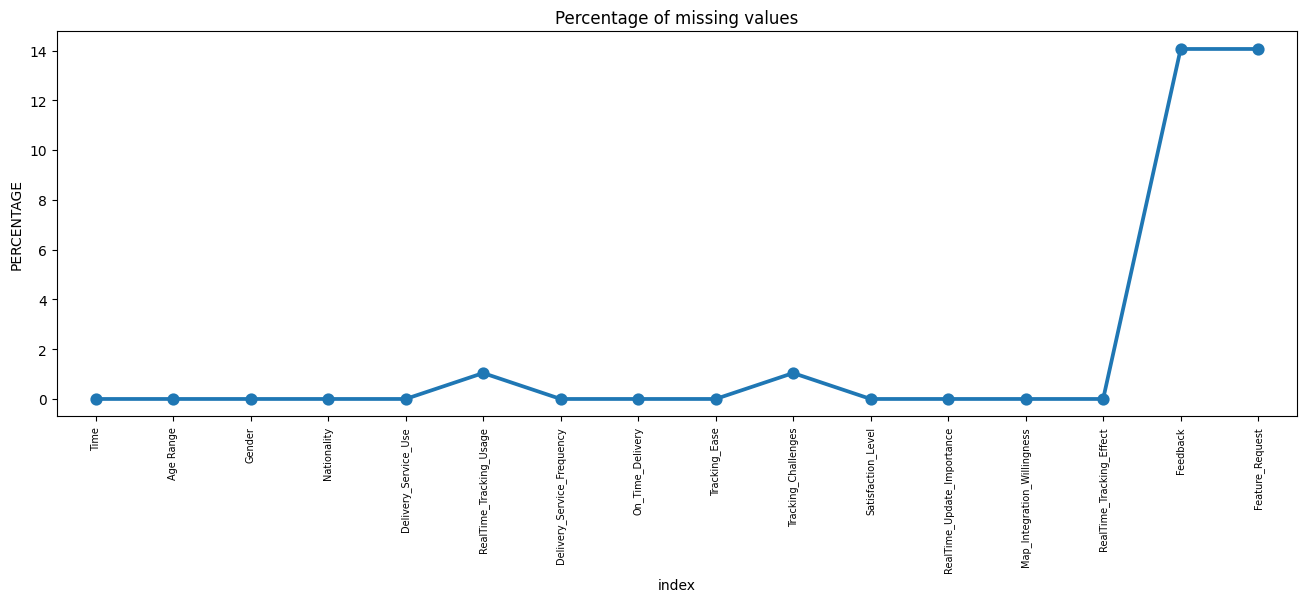

In [ ]:
# visualizing our missing data

missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure (figsize = (16, 5))
ax = sns.pointplot (x = "index", y = 0, data = missing)
plt.xticks (rotation = 90, fontsize = 7)
plt.title ("Percentage of missing values")
plt.ylabel ("PERCENTAGE")
plt.show()

**We have null values in realtime tracking usage, feedback and feature request columns**

**Since we do not need the feeback and feature request column, we are going to drop them**

# **2. Dropping unnecessary columns**

In [ ]:
# dropping unnecessary columns

new_df = df.drop(["Time", "Feedback", "Feature_Request"], axis = 1)

new_df.head(2)

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Tracking_Challenges,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect
0,18-35,Male,"Lagos, Nigeria",Yes,NaN,Rarely (almost never),Yes,3,Limited tracking options,3,Very important,Yes,Yes
1,18-35,Female,Nigeria,Yes,NaN,Rarely (almost never),Yes,1,"Lack of tracking information, Communication is...",3,Very important,Yes,Yes


In [ ]:
import statistics

# we have two null values in realtime tracking usage

new_df["RealTime_Tracking_Usage"].isnull().sum()

2

**We decided to use the median to fill in the missing values**

In [ ]:
# Converting  categorical columns to binary numbers using mapping method

new_value = {"Yes" : 1, "No" : 0}

new_df["RealTime_Tracking_Usage"] = new_df["RealTime_Tracking_Usage"].replace(new_value)

In [ ]:
# Getting the median value

import statistics

median = new_df["RealTime_Tracking_Usage"].median()

median

1.0

In [ ]:
# Filling the missing value

new_df["RealTime_Tracking_Usage"].fillna(median, inplace = True)


In [ ]:
# checking for null values after filling the null values with the median

new_df["RealTime_Tracking_Usage"].isnull().sum()

0

**After filling the null values with th median value, the real time tracking usage returned zero null values after cecking again.**

In [ ]:
# Convert real time tracking usage values back to initial values

new_value = {1 : "Yes", 0 : "No"}

new_df["RealTime_Tracking_Usage"] = new_df["RealTime_Tracking_Usage"].replace(new_value)

In [ ]:
#defining the top rows
new_df.head()

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Tracking_Challenges,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect
0,18-35,Male,"Lagos, Nigeria",Yes,Yes,Rarely (almost never),Yes,3,Limited tracking options,3,Very important,Yes,Yes
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,"Lack of tracking information, Communication is...",3,Very important,Yes,Yes
2,18-35,Female,Nigeria,Yes,No,Rarely (almost never),Yes,3,"Delayed delivery, Lack of tracking information...",2,Extremely important,Yes,Yes
3,18-35,Female,Nigeria,Yes,No,Never,No,3,"Delayed delivery, Lack of tracking information...",2,Very important,Yes,Yes
4,35-60,Female,Nigeria,Yes,Yes,Multiple times a month,No,4,Communication issues with carrier,3,Very important,Yes,Yes


# **3. Tackling RealTime_Update_Importance which contains both string and integers**

In [ ]:
#calling the realTime_Update_importance column
new_df["RealTime_Update_Importance"]

0           Very important
1           Very important
2      Extremely important
3           Very important
4           Very important
              ...         
187                      5
188                      2
189                      3
190                      4
191                      5
Name: RealTime_Update_Importance, Length: 192, dtype: object

In [ ]:
# Some of the values contains integer while the rest contains string

#They need to be converted to integer

new_value = {"Not important" : 1, "Slightly important" : 2, "Moderately important" : 3, "Very important" : 4, "Extremely important" : 5}

new_df["RealTime_Update_Importance"] = new_df["RealTime_Update_Importance"].replace(new_value)

In [ ]:
#defining RealTime_Update_Importance column
new_df["RealTime_Update_Importance"]

0      4
1      4
2      5
3      4
4      4
      ..
187    5
188    2
189    3
190    4
191    5
Name: RealTime_Update_Importance, Length: 192, dtype: object

# 4. **Regrouping nationality column**

 **The nationality column was no properly grouped because of the way respondents filled their answers. Some of the respinses had spaces in thw rong places while some did not use the generic words for nationlaity/country but used states/provinces instead.**

In [ ]:
# Tackling nationality issue

new_df["Nationality"].value_counts()

Nationality
Nigeria                                         83
Nigeria                                         71
United Kingdom                                   5
Kenya                                            3
United Kingdom                                   3
Nigerian                                         3
Canada                                           2
Australia                                        2
Romania                                          1
Ghana                                            1
Nigeria 🇳🇬                                       1
Country                                          1
England                                          1
Lagos                                            1
Kano                                             1
Kaduna state Nigeria                             1
 Nigeria                                         1
Lagos, Nigeria                                   1
Enugu                                            1
USA                

In [ ]:
#renaming the nationality column using dictionary
new = {"Lagos, Nigeria ":"Nigeria" ,"Ghana ": "Ghana", "Nigeria ": "Nigeria","Cross River ": "Nigeria","Enugu ": "Nigeria","Lagos ": "Nigeria","Nigeria 🇳🇬 " : "Nigeria", "Nigerian ": "Nigeria", "United Kingdom ":"United Kingdom", "Kenya ":"Kenya", "Country": "Nigeria",
    "nigeria" : "Nigeria", "Biafra": "Nigeria", "Abuja Nigeria": "Nigeria", "Kano": "Nigeria", "Kaduna state Nigeria": "Nigeria", "kenya" : "Kenya", "England" : "United Kingdom", " Nigeria":"Nigeria"}

new_df["Nationality"] = new_df["Nationality"].replace(new)

**Mapping method was used to rename the columns by assigning values to keys as in with the dictionary format.**

In [ ]:
#Checking the value count for nationality column
new_df["Nationality"].value_counts()

Nationality
Nigeria                                         169
United Kingdom                                    9
Kenya                                             5
Australia                                         2
Ghana                                             2
Canada                                            2
USA                                               1
Romania                                           1
Nigerian living in the United Arab Emirates       1
Name: count, dtype: int64

In [ ]:

new_df.head(2)

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Tracking_Challenges,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,Limited tracking options,3,4,Yes,Yes
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,"Lack of tracking information, Communication is...",3,4,Yes,Yes


# **5. Tackling Tracking Challenges**

In [ ]:
new_df["Tracking_Challenges"]

0                               Limited tracking options
1      Lack of tracking information, Communication is...
2      Delayed delivery, Lack of tracking information...
3      Delayed delivery, Lack of tracking information...
4                      Communication issues with carrier
                             ...                        
187                                            No issues
188       Delayed delivery, Lack of tracking information
189                             Limited tracking options
190                                                  NaN
191    Delayed delivery, Lack of tracking information...
Name: Tracking_Challenges, Length: 192, dtype: object

In [ ]:
# we are going to split it into different columns

In [ ]:
# Split challenges into separate columns
challenges_df = new_df['Tracking_Challenges'].str.split(', ', expand=True)

# Rename columns
challenges_df.columns = ['Challenge_{}'.format(i+1) for i in range(challenges_df.shape[1])]

# Concatenate challenges DataFrame with original DataFrame
new_df = pd.concat([new_df, challenges_df], axis=1)

# Drop the original 'Tracking_Challenges' column if no longer needed
new_df.drop(columns=['Tracking_Challenges'], inplace=True)


**Here, we used the .split() methods to split the Tracking challenges faced by our respondents into column for ease in analysis. This helped us to drill down our Tracking challenges column to the most common ones.**

In [ ]:
# mapping the challenges column

new_value = {"I do not receive notifications immediately my package reaches it's destination": "Communication Issues", "Sending to another state instead of my state":"Package Misplacement","None that I can remember " : "No Challenge", "None " : "No Challenge", "My packages were always delivered in good time.":"No Challenge", "It wasn't difficult tracking ":"No Challenge","Package misplacement / loss":"Package Misplacement" , "Delayed delivery":"Delay", "Communication issues with carrier":"Communication Issues", "Lack of tracking information":"No Tracking Information", "Limited tracking options":"Limited Tracking Options"}

new_df["Challenge_1"] = new_df["Challenge_1"].replace(new_value)
new_df["Challenge_2"] = new_df["Challenge_2"].replace(new_value)
new_df["Challenge_3"] = new_df["Challenge_3"].replace(new_value)
new_df["Challenge_4"] = new_df["Challenge_4"].replace(new_value)
new_df["Challenge_5"] = new_df["Challenge_5"].replace(new_value)

In [ ]:
new_df[["Challenge_1", "Challenge_2", "Challenge_3", "Challenge_4", "Challenge_5"]]

,Challenge_1,Challenge_2,Challenge_3,Challenge_4,Challenge_5
0,Limited Tracking Options,None,None,None,None
1,No Tracking Information,Communication Issues,None,None,None
2,Delay,No Tracking Information,Communication Issues,Limited Tracking Options,None
3,Delay,No Tracking Information,Communication Issues,Limited Tracking Options,None
4,Communication Issues,None,None,None,None
...,...,...,...,...,...
187,No issues,None,None,None,None
188,Delay,No Tracking Information,None,None,None
189,Limited Tracking Options,None,None,None,None
190,NaN,NaN,NaN,None,None


In [ ]:
#checking for null values of the challenges column
new_df["Challenge_1"].isnull().sum()

2

In [ ]:
new_df["Challenge_2"].isnull().sum()

91

In [ ]:
new_df["Challenge_3"].isnull().sum()

134

In [ ]:
new_df["Challenge_4"].isnull().sum()

166

In [ ]:
new_df["Challenge_5"].isnull().sum()

184

**Since challenge 2-5 are mostly null, we have decided to drop these columns and pick the column that has lesser null values**

In [ ]:
# Dropping the unnecessary columns
clean_df = new_df.drop(["Challenge_2", "Challenge_3", "Challenge_4", "Challenge_5" ], axis =1 )

In [ ]:
clean_df.head(2)

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect,Challenge_1
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,4,Yes,Yes,Limited Tracking Options
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,3,4,Yes,Yes,No Tracking Information


In [ ]:
#defining our columns
clean_df.columns

Index(['Age Range', 'Gender', 'Nationality', 'Delivery_Service_Use',
       'RealTime_Tracking_Usage', 'Delivery_Service_Frequency',
       'On_Time_Delivery', 'Tracking_Ease', 'Satisfaction_Level',
       'RealTime_Update_Importance', 'Map_Integration_Willingness',
       'RealTime_Tracking_Effect', 'Challenge_1'],
      dtype='object')

# **6. Converting RealTime_Update_Importance from an object to an Integer**

In [ ]:
#formatting the RealTime_Update_Importance column into integer
clean_df["RealTime_Update_Importance"] = clean_df["RealTime_Update_Importance"].astype(int)

clean_df["RealTime_Update_Importance"]

0      4
1      4
2      5
3      4
4      4
      ..
187    5
188    2
189    3
190    4
191    5
Name: RealTime_Update_Importance, Length: 192, dtype: int64

**This is a five likert scale question which required respondednts to pick between 1-5. Some were in integer format while some in string format.We converted the real time update importance to an integer to keep our responses uniform.**

# **7. Cleaned Data set**

In [ ]:
#defining the two first rows of the dataset
clean_df.head(2)

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect,Challenge_1
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,4,Yes,Yes,Limited Tracking Options
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,3,4,Yes,Yes,No Tracking Information


In [ ]:
# Recall data set after renaming challenge column
clean_df.head(2)

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect,Challenge_1
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,4,Yes,Yes,Limited Tracking Options
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,3,4,Yes,Yes,No Tracking Information


# **EDA BEGINS**

1. Demography (Age, Gender, Nationality)
2. Demography vs delivery services usage
4. Tracking ease vs satisfaction
6. Challenges
7. On time vs Satisfaction
8. RealTime_Update_Importance vs RealTime_Tracking Effect
9. Delivery_Service_Frequency
10. RealTime_Tracking_Usage vs Tracking ease
Realtime tracking usage vs Delivery usage
11. Challenges vs Delivery Service Usage*
12. challenges vs demographic
Willingness to use map vs age range or gender



# **1. DEMOGRAPHY**

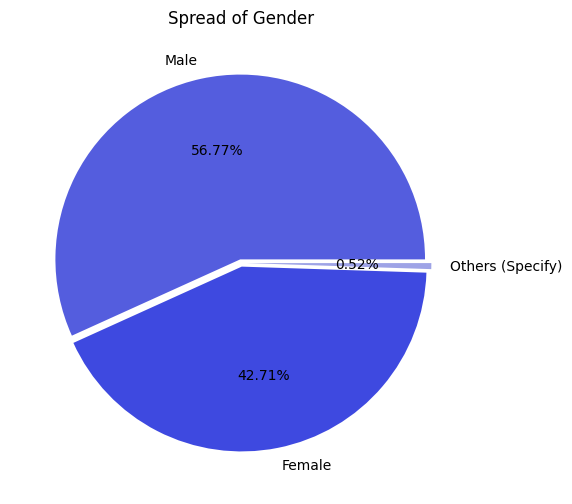

In [ ]:
#creating a chart for gender
colors = ["#545DDE", "#3E49E0", "#9EA3E6"]
plt.figure(figsize=(6,6))
plt.pie(x = clean_df["Gender"].value_counts(), labels = ["Male", "Female", "Others (Specify)"], autopct = "%1.2f%%",colors = colors, explode = (0.02, 0.02,0.03))
plt.title("Spread of Gender")
plt.show()

**The above shows there are more male spread in this data set which carries a weight of 56% while the female and others carries the remaining 47% cumulative.**

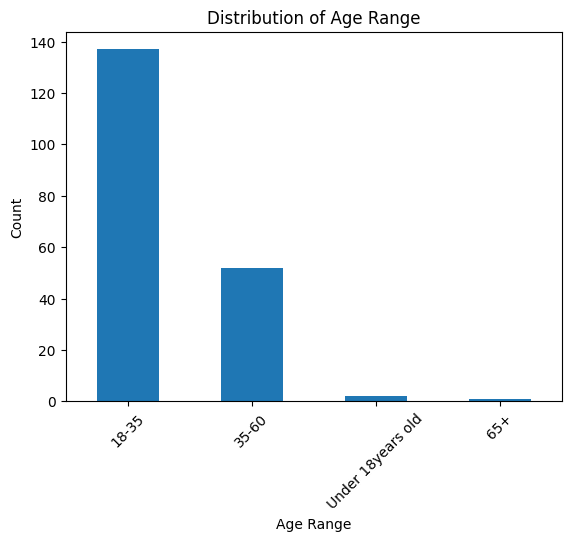

In [ ]:
# visualizing the age range

clean_df["Age Range"].value_counts().plot (kind = "bar")

plt.xlabel ("Age Range")
plt.ylabel ("Count")
plt.title ("Distribution of Age Range")
plt.xticks (rotation = 45)
plt.show()

**The responsdents for this study have a high response rate from the 18-35 age group and the least response rate from 65 and above age group.**

**This implies that our analysis will be based on mostly Gen zs and millenials which are our target audience.**

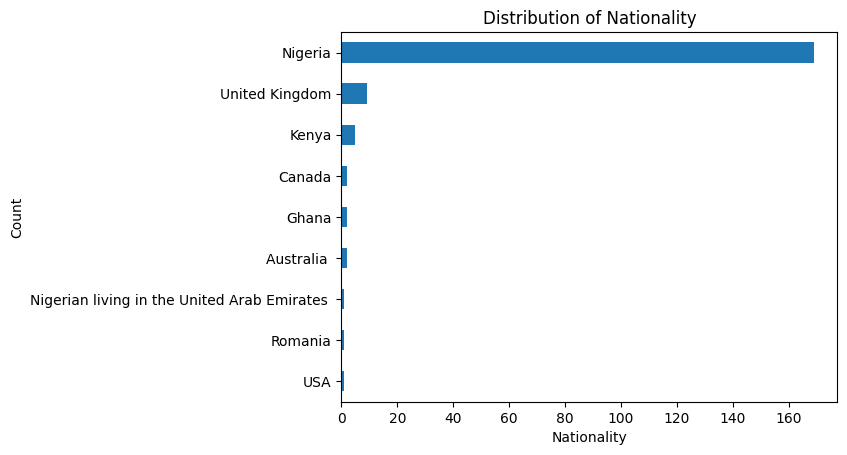

In [ ]:
# Visualizing nationality
nationality = clean_df["Nationality"].value_counts().sort_values(ascending = True)
nationality.plot (kind = "barh")
plt.xlabel ("Nationality")
plt.ylabel ("Count")
plt.title ("Distribution of Nationality")
plt.show()

**Our respondents constitute mostly Nigerians as we used convenience random sampling due to time constraints.**

# **2. DEMOGRAPHY VS DELIVERY SERVICE USAGE**

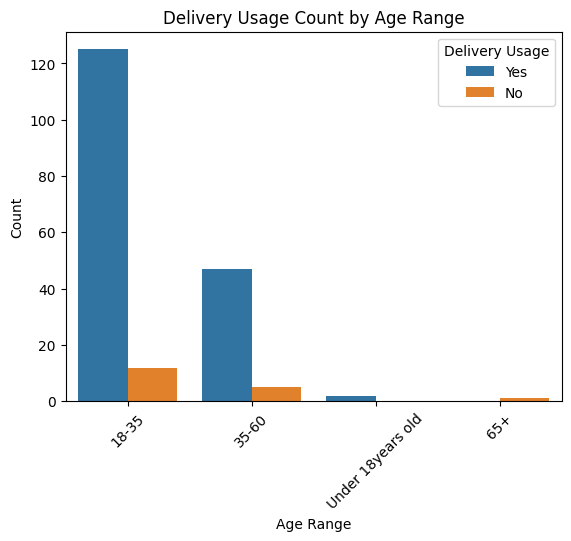

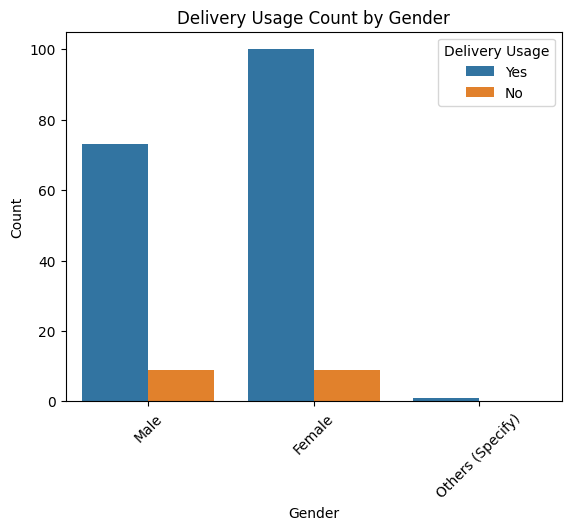

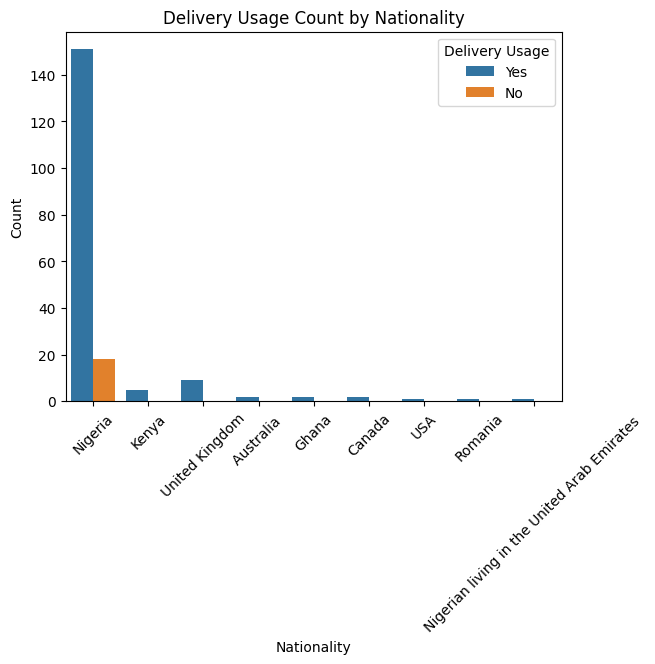

In [ ]:
# Get the delivery usage across demography
# Iterate over the columns "Age Range", "Gender", and "Nationality"

for i, col in enumerate(["Age Range", "Gender", "Nationality"]):
    plt.figure(i)
    sns.countplot(data=clean_df, x=col, hue="Delivery_Service_Use")
    plt.title(f"Delivery Usage Count by {col}")
    plt.xlabel(col)
    plt.ylabel ("Count")
    plt.legend (title="Delivery Usage")
    plt.xticks (rotation = 45)
    plt.show()

The charts above show the delivery usage by age, gender, and Nationality.

**Age**: The chart shows that age group 18-35 use delivery servicesmore than other age groups.

**Gende**r: The female gender came up as the highest users of delivery services. The reason could be that women tend to have more shopping needs than the other genders; Male and others.

**Nationality**: Although this sample is not suitable enough to represent this population, more Nigerians who were the majority of the respondents use delivery services more than other nationalities.

# **3. REAL TIME VS DEMOGRAPHY**

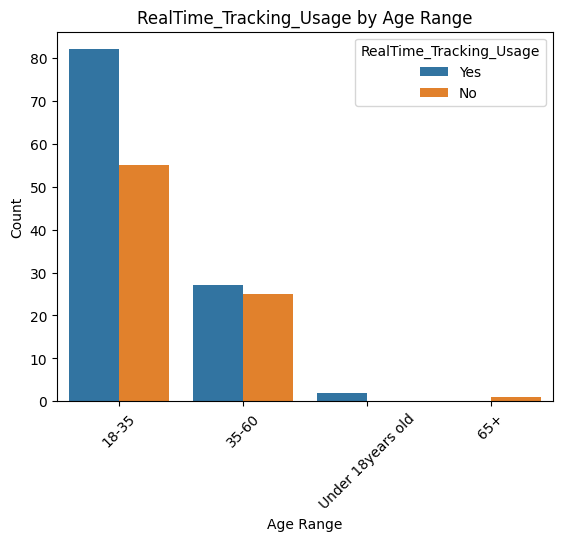

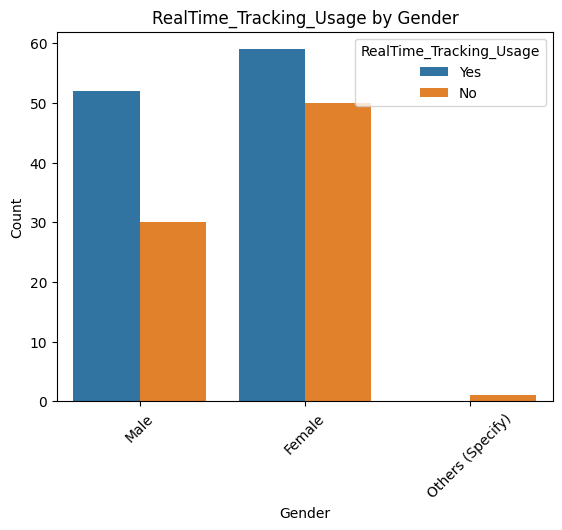

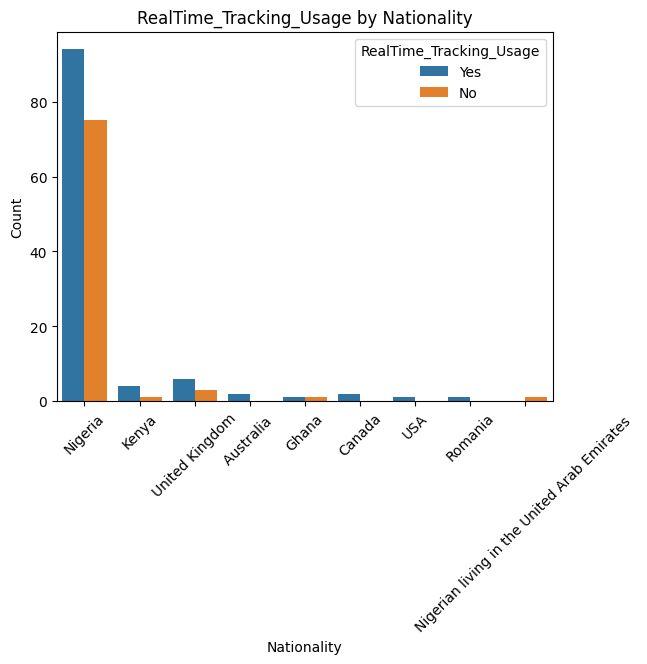

In [ ]:
# Get the real-time usage across demography
# Iterate over the columns "Age Range", "Gender", and "Nationality"

for i, col in enumerate(["Age Range", "Gender", "Nationality"]):
    plt.figure(i)
    sns.countplot(data=clean_df, x=col, hue= "RealTime_Tracking_Usage")
    plt.title(f"RealTime_Tracking_Usage by {col}")
    plt.xlabel(col)
    plt.ylabel ("Count")
    plt.legend (title="RealTime_Tracking_Usage")
    plt.xticks (rotation = 45)
    plt.show()

**Real time trackage usage**

**By age**: Most of the respondent between 18-35 confirm that they are willing to use a real time trackage solution if in existence. However, respondents who fall in the senior citizens category are not interested in the real time tracking solution. This could be due to their preferences and might prefer traditional shopping to online shopping or ordering.

**By gender**: More females are interested in the real time tracking solution than males are interested. On the contrary, there are more non-interested females who are interested in the real time tracking solution than that of non-interested males.

**Nationality**: most Nigerians clain that they have used a real-time tracking system for their orders/shipment. On the contrary, more Nigerians have not used the real-time tracking solution for their orders/shipment.

# **4. TRACKING EASE VS SATISFACTION**

In [ ]:
#calling Tracking_Ease and Satisfaction_Level columns
clean_df[["Tracking_Ease", "Satisfaction_Level"]]

,Tracking_Ease,Satisfaction_Level
0,3,3
1,1,3
2,3,2
3,3,2
4,4,3
...,...,...
187,3,3
188,2,4
189,3,3
190,5,4


<Axes: xlabel='Tracking_Ease', ylabel='Satisfaction_Level'>

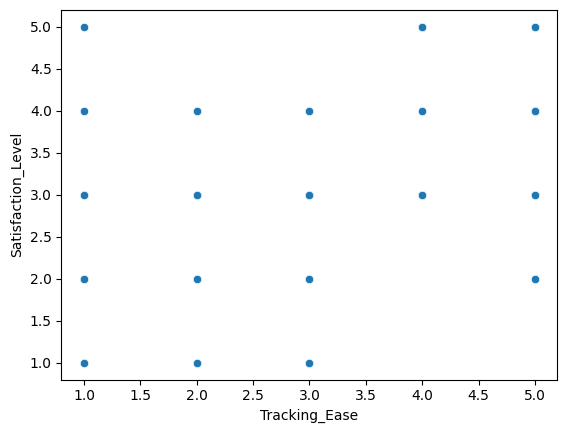

In [ ]:
#plotting a visual for tracking ease and satisfaction level
sns.scatterplot (x= "Tracking_Ease" , y = "Satisfaction_Level", data = clean_df)

In [ ]:
#checking the correlation btn tracking ease and satisfaction level
clean_df["Tracking_Ease"].corr (clean_df["Satisfaction_Level"])

0.5228281108735843

A correlation coefficient of **0.515** indicates a moderately strong positive correlation between "**Tracking_Ease**" and "**Satisfaction_Level**".

This means that as the ease of tracking increases, satisfaction levels tend to increase as well.

However, it's important to note that **correlation does not imply causation**, so while these variables may be correlated, there could be other factors influencing satisfaction levels.

# **5.FREQUENCY OF DELIVERY USAGE**

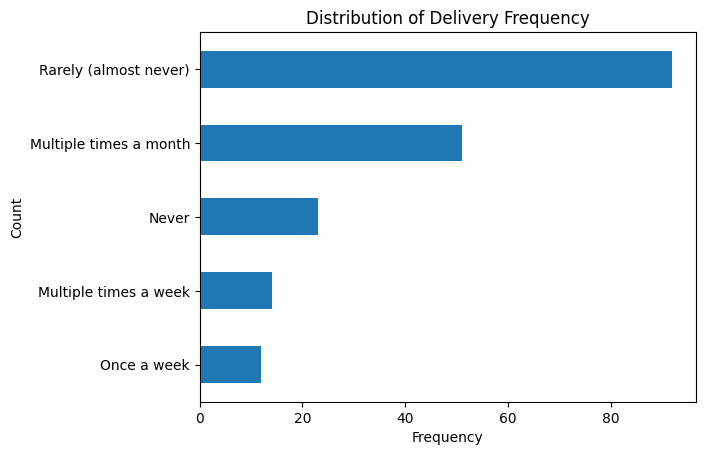

In [ ]:
# visualizing delivery frequency
delivery_frequency = clean_df["Delivery_Service_Frequency"].value_counts().sort_values(ascending = True)
delivery_frequency.plot(kind = "barh")
plt.xlabel ("Frequency")
plt.ylabel ("Count")
plt.title ("Distribution of Delivery Frequency")
plt.show()

**Most respondents rarely or almost never use a delivery service for their orders or packages. even in this era when e-commerce is at its boom, it is surprising to see that such is the case.**

**However, we stil have respondents who use delivery services multiple times a month which indicates, not entirely, the availability of demand.**

# **6. CHALLENGES**

In [ ]:
 challenge = clean_df[["Challenge_1"]].value_counts()
 challenge


Challenge_1             
Delay                       94
Communication Issues        31
No Tracking Information     30
Limited Tracking Options    26
No Challenge                 4
Others (specify)             2
Package Misplacement         2
No issues                    1
Name: count, dtype: int64

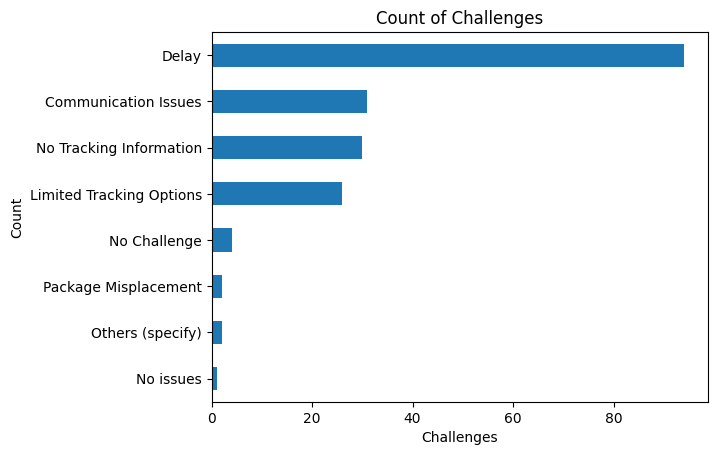

In [ ]:
# visualizing the age range

challenges = clean_df["Challenge_1"].value_counts().sort_values(ascending = True)
challenges.plot (kind = "barh")

plt.xlabel ("Challenges")
plt.ylabel ("Count")
plt.title ("Count of Challenges")
plt.show()

**The above barchart showing the distribution of challenges indicates that most people experience delay (87 from the response) in deliveries and not so much experience package misplacement.**

**Communication issues are also part of the issues experience after delay. There are also people who have never experienced any challenege while using a delivery service.**

# **7. SATISFACTION VS REAL TIME UPDATE IMPORTANCE**

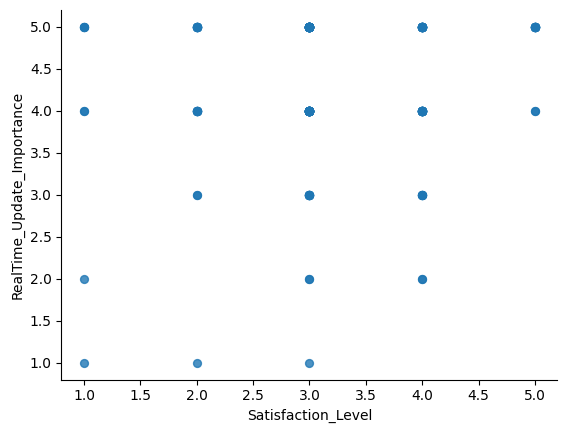

In [ ]:
# Satisfaction_Level vs RealTime_Update_Importance
clean_df.plot(kind='scatter', x='Satisfaction_Level', y='RealTime_Update_Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#checking for relationship btn satisfaction level and realtime update importance
clean_df["Satisfaction_Level"].corr(clean_df["RealTime_Update_Importance"])

0.13341352833062614

 The above correlation coefficient indicates that there appears to be **a very weak positive relationship** between **Satisfaction_Level** and **RealTime_Update_Importance**, but it's not substantial enough to draw strong conclusions.

# **8. ON TIME DELIVERY AND SATISFACTION LEVEL USING A BOX PLOT**

<Axes: xlabel='On_Time_Delivery', ylabel='Satisfaction_Level'>

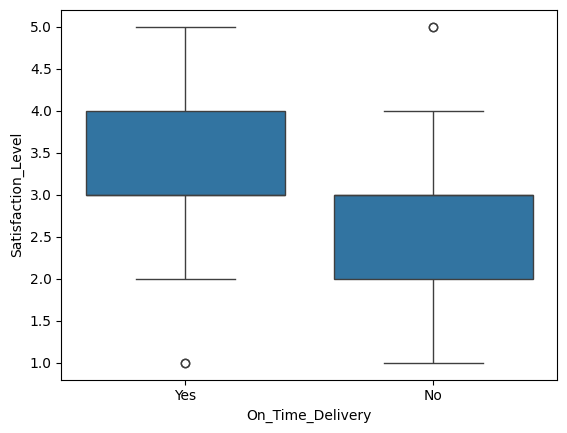

In [ ]:
#visualizing on time delivery and satisfaction level using a box plot
sns.boxplot (x = "On_Time_Delivery", y = "Satisfaction_Level", data = clean_df)


# **9. CORRELATION BETWEEN REAL TIME IMPORTANCE AND REAL TIME EFFECT**

In [ ]:
# Method 1: ANOVA
# Check if there are significant differences in the means across different categories
f_statistic, p_value = f_oneway(*[group["RealTime_Update_Importance"] for name, group in clean_df.groupby("RealTime_Tracking_Effect")])
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 9.859443637938938
ANOVA p-value: 8.453859881431626e-05


# **10. MAP INTEGRATION WILLINGNESS**

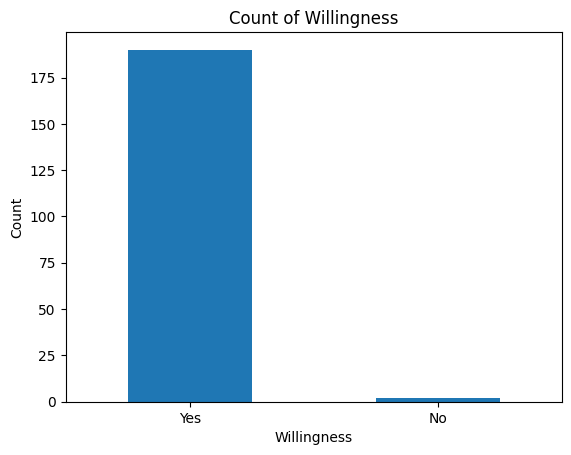

In [ ]:
# visualizing the map integration willingness
willingness = clean_df["Map_Integration_Willingness"].value_counts().plot(kind="bar")

plt.xlabel ("Willingness")
plt.ylabel ("Count")
plt.title ("Count of Willingness")
plt.xticks(rotation = 0)
plt.show()

# **11. CORRELATION RELATIONSHIP BETWEEN MAP INTEGRATION AND REAL TIME TRACKING EFFECT**

In [ ]:
 # To determine the correlation relationship between map integration willingness and real time tracking effect
 def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


correlation = cramers_v(clean_df["Map_Integration_Willingness"], clean_df["RealTime_Tracking_Effect"])
print("Cramer's V correlation coefficient:", correlation)

Cramer's V correlation coefficient: 0.367662608563001


**Cramer's V value of approximately 0.38 means there's a moderate correlation between the two categorical variables being studied. This suggests that there's some connection between them, but it's not very strong. When comparing categorical variables, higher Cramer's V values indicate stronger relationships, while lower values suggest weaker or no relationships. Therefore, in this case, the moderate correlation indicates that while there's some association between the variables, it's not particularly strong.**

# **12. REAL TIME TRACKING IMPORTANCE**

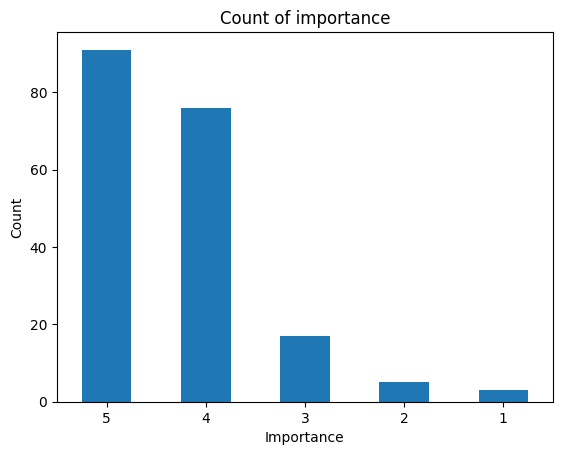

In [ ]:
# visualization of the real time tracking importance
importance = clean_df["RealTime_Update_Importance"].value_counts().plot(kind="bar")
plt.xlabel ("Importance")
plt.ylabel ("Count")
plt.title ("Count of importance")
plt.xticks(rotation = 0)
plt.show()

# **BUILDING THE LOGISTIC REGRESSION**


In [ ]:
# import the required libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# making a new copy for machine model

model_data = clean_df.copy()

model_data.head()

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect,Challenge_1
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,4,Yes,Yes,Limited Tracking Options
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,3,4,Yes,Yes,No Tracking Information
2,18-35,Female,Nigeria,Yes,No,Rarely (almost never),Yes,3,2,5,Yes,Yes,Delay
3,18-35,Female,Nigeria,Yes,No,Never,No,3,2,4,Yes,Yes,Delay
4,35-60,Female,Nigeria,Yes,Yes,Multiple times a month,No,4,3,4,Yes,Yes,Communication Issues


In [ ]:
# load the dataset

model_data.head()

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Map_Integration_Willingness,RealTime_Tracking_Effect,Challenge_1
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,4,Yes,Yes,Limited Tracking Options
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,3,4,Yes,Yes,No Tracking Information
2,18-35,Female,Nigeria,Yes,No,Rarely (almost never),Yes,3,2,5,Yes,Yes,Delay
3,18-35,Female,Nigeria,Yes,No,Never,No,3,2,4,Yes,Yes,Delay
4,35-60,Female,Nigeria,Yes,Yes,Multiple times a month,No,4,3,4,Yes,Yes,Communication Issues


# We will decode the categorical

- One-Hot Encoding is used where categorical variables has no inherent order or hierarchy.

- Label Encoding is used where categorical variables has ordinal categories which can be ranked.

# LABEL ENCODING

In [ ]:
#mapping the catergorical columns to numeric using label encoder
le = LabelEncoder ()
le

LabelEncoder()

In [ ]:
le.fit_transform(model_data["Age Range"])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
model_data["Age_Range_Label"] = le.fit_transform(model_data["Age Range"])
model_data["Age_Range_Label"]

0      0
1      0
2      0
3      0
4      1
      ..
187    0
188    0
189    0
190    1
191    1
Name: Age_Range_Label, Length: 192, dtype: int64

In [ ]:
model_data["Age_Range_Label"].value_counts()

Age_Range_Label
0    137
1     52
3      2
2      1
Name: count, dtype: int64

In [ ]:
# to check value counts of age range

model_data["Age Range"].value_counts()

Age Range
18-35                137
35-60                 52
Under 18years old      2
65+                    1
Name: count, dtype: int64

# ONE HOT ENCODING

In [ ]:
# creating a dummy variable of categorical dataset

dummy = pd.get_dummies (model_data[[ 'Gender', 'Nationality', 'Delivery_Service_Use',
       'RealTime_Tracking_Usage', 'Delivery_Service_Frequency',
       'On_Time_Delivery',
       'RealTime_Tracking_Effect', 'Challenge_1']], dtype = int)

dummy

,Gender_Female,Gender_Male,Gender_Others (Specify),Nationality_Australia,Nationality_Canada,Nationality_Ghana,Nationality_Kenya,Nationality_Nigeria,Nationality_Nigerian living in the United Arab Emirates,Nationality_Romania,...,RealTime_Tracking_Effect_No,RealTime_Tracking_Effect_Yes,Challenge_1_Communication Issues,Challenge_1_Delay,Challenge_1_Limited Tracking Options,Challenge_1_No Challenge,Challenge_1_No Tracking Information,Challenge_1_No issues,Challenge_1_Others (specify),Challenge_1_Package Misplacement
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
188,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
189,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
190,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#merging the dummy variable
merged_df = pd.concat ([model_data, dummy], axis = "columns")

merged_df

,Age Range,Gender,Nationality,Delivery_Service_Use,RealTime_Tracking_Usage,Delivery_Service_Frequency,On_Time_Delivery,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,...,RealTime_Tracking_Effect_No,RealTime_Tracking_Effect_Yes,Challenge_1_Communication Issues,Challenge_1_Delay,Challenge_1_Limited Tracking Options,Challenge_1_No Challenge,Challenge_1_No Tracking Information,Challenge_1_No issues,Challenge_1_Others (specify),Challenge_1_Package Misplacement
0,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,4,...,0,1,0,0,1,0,0,0,0,0
1,18-35,Female,Nigeria,Yes,Yes,Rarely (almost never),Yes,1,3,4,...,0,1,0,0,0,0,1,0,0,0
2,18-35,Female,Nigeria,Yes,No,Rarely (almost never),Yes,3,2,5,...,0,1,0,1,0,0,0,0,0,0
3,18-35,Female,Nigeria,Yes,No,Never,No,3,2,4,...,0,1,0,1,0,0,0,0,0,0
4,35-60,Female,Nigeria,Yes,Yes,Multiple times a month,No,4,3,4,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,18-35,Female,Nigeria,Yes,No,Rarely (almost never),Yes,3,3,5,...,0,1,0,0,0,0,0,1,0,0
188,18-35,Female,Nigeria,Yes,No,Never,Yes,2,4,2,...,0,1,0,1,0,0,0,0,0,0
189,18-35,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,3,3,3,...,0,1,0,0,1,0,0,0,0,0
190,35-60,Male,Nigeria,Yes,Yes,Rarely (almost never),Yes,5,4,4,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#defining our columns
merged_df.columns

Index(['Age Range', 'Gender', 'Nationality', 'Delivery_Service_Use',
       'RealTime_Tracking_Usage', 'Delivery_Service_Frequency',
       'On_Time_Delivery', 'Tracking_Ease', 'Satisfaction_Level',
       'RealTime_Update_Importance', 'Map_Integration_Willingness',
       'RealTime_Tracking_Effect', 'Challenge_1', 'Age_Range_Label',
       'Gender_Female', 'Gender_Male', 'Gender_Others (Specify)',
       'Nationality_Australia ', 'Nationality_Canada', 'Nationality_Ghana',
       'Nationality_Kenya', 'Nationality_Nigeria',
       'Nationality_Nigerian living in the United Arab Emirates ',
       'Nationality_Romania', 'Nationality_USA', 'Nationality_United Kingdom',
       'Delivery_Service_Use_No', 'Delivery_Service_Use_Yes',
       'RealTime_Tracking_Usage_No', 'RealTime_Tracking_Usage_Yes',
       'Delivery_Service_Frequency_Multiple times a month',
       'Delivery_Service_Frequency_Multiple times a week',
       'Delivery_Service_Frequency_Never',
       'Delivery_Service_Frequenc

In [ ]:
# defining the X variable

X = merged_df.drop(['Age Range', 'Gender', 'Nationality', 'Delivery_Service_Use',
       'RealTime_Tracking_Usage', 'Delivery_Service_Frequency',
       'On_Time_Delivery', 'Map_Integration_Willingness',
       'RealTime_Tracking_Effect','Gender_Male',
        'Nationality_United Kingdom', 'Delivery_Service_Use_Yes', 'RealTime_Tracking_Usage_Yes',
        'Delivery_Service_Frequency_Rarely (almost never)', 'On_Time_Delivery_Yes',
         'RealTime_Tracking_Effect_Yes', 'Challenge_1'], axis = 1)

X

,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Age_Range_Label,Gender_Female,Gender_Others (Specify),Nationality_Australia,Nationality_Canada,Nationality_Ghana,Nationality_Kenya,...,RealTime_Tracking_Effect_Neutral,RealTime_Tracking_Effect_No,Challenge_1_Communication Issues,Challenge_1_Delay,Challenge_1_Limited Tracking Options,Challenge_1_No Challenge,Challenge_1_No Tracking Information,Challenge_1_No issues,Challenge_1_Others (specify),Challenge_1_Package Misplacement
0,3,3,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,3,4,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,3,3,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
188,2,4,2,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
189,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
190,5,4,4,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# convert to an integer

new_value = {"Yes" : 1, "No" : 0}

model_data["Map_Integration_Willingness"] = model_data["Map_Integration_Willingness"].replace(new_value)



In [ ]:
# defining the y variable

y = model_data["Map_Integration_Willingness"]

y

0      1
1      1
2      1
3      1
4      1
      ..
187    1
188    1
189    1
190    1
191    1
Name: Map_Integration_Willingness, Length: 192, dtype: int64

In [ ]:
# creating our logistic regression model

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

In [ ]:
#training,testing and splitting dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [ ]:
#defining our X_train
X_train

,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Age_Range_Label,Gender_Female,Gender_Others (Specify),Nationality_Australia,Nationality_Canada,Nationality_Ghana,Nationality_Kenya,...,RealTime_Tracking_Effect_Neutral,RealTime_Tracking_Effect_No,Challenge_1_Communication Issues,Challenge_1_Delay,Challenge_1_Limited Tracking Options,Challenge_1_No Challenge,Challenge_1_No Tracking Information,Challenge_1_No issues,Challenge_1_Others (specify),Challenge_1_Package Misplacement
51,3,3,5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
62,4,5,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
142,3,3,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40,2,4,5,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
182,2,2,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4,3,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34,3,3,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
70,3,3,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
153,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#defining X_test
X_test

,Tracking_Ease,Satisfaction_Level,RealTime_Update_Importance,Age_Range_Label,Gender_Female,Gender_Others (Specify),Nationality_Australia,Nationality_Canada,Nationality_Ghana,Nationality_Kenya,...,RealTime_Tracking_Effect_Neutral,RealTime_Tracking_Effect_No,Challenge_1_Communication Issues,Challenge_1_Delay,Challenge_1_Limited Tracking Options,Challenge_1_No Challenge,Challenge_1_No Tracking Information,Challenge_1_No issues,Challenge_1_Others (specify),Challenge_1_Package Misplacement
57,3,4,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31,4,3,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80,5,5,5,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
185,3,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
105,3,3,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,1,1,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
184,3,3,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,3,3,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,3,3,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
61,4,3,3,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#loading our model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression ()

In [ ]:
#fitting our model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predicting our y
y_predicted = model.predict (X_test)

y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#checking for the accuracy of the model
model.score (X_test, y_test)

1.0

In [ ]:
#checking for precision,recall,and f1_score
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_predicted))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



The data model has a precision, recall and accuracy of 1.0 because of the size of data.

The dataset is relatively small, and majority of responsed voted to use the real time tracking solution, hence the reason for the perfect score.  

# **THE END**